# Caipora Project


__Objecitve__

Explore data generated by _data_preparation.ipynb_.

 
__Data Source__

__${WORKDIR}__/data/ouptut/hotspot_spi.csv


In [1]:
import os
import math

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Constants

In [2]:
WORKDIR = os.path.abspath(os.getcwd())

YEARS_AVAILABLE = [2014, 2018, 2021]

## Get the data

__Load into Pandas DataFrame__

In [3]:
file = ''.join([WORKDIR, "/data/output/hotspot_spi.csv"]) 
dataset = pd.read_csv(file)

dataset.head()

,ano,estado,municipio,diasemchuva,precipitacao,riscofogo,frp,fococalor,IPS Amazônia,Media IPS,...,Gravidez na infância e adolescência,Trabalho Infantil,Vulnerabilidade familiar,Violência contra indígenas,Violência contra indígenas Taxa,Violência contra mulheres,Violência infantil,Violência infantil Taxa,Empregos ensino superior,Mulheres com empregos ensino superior
0,2014,ACRE,ACRELANDIA,0.9,0.38,0.23,0.0,441,54.64,54.45,...,26.77,288.91,12.27,0.00,1.0,29.60,22.32,2.0,13.81,7.35
1,2014,ACRE,ASSIS BRASIL,1.7,0.46,0.15,0.0,327,53.48,54.45,...,36.22,201.25,17.35,1.88,2.0,58.91,80.48,3.0,8.17,4.54
2,2014,ACRE,BRASILEIA,1.4,0.36,0.19,0.0,1120,50.05,54.45,...,31.08,144.83,20.11,40.00,5.0,300.00,683.19,5.0,9.97,6.59
3,2014,ACRE,BUJARI,0.8,0.36,0.12,0.0,339,54.02,54.45,...,34.30,824.47,16.12,0.00,1.0,45.11,32.66,2.0,12.97,9.16
4,2014,ACRE,CAPIXABA,0.8,0.10,0.08,0.0,455,53.15,54.45,...,32.05,172.42,26.07,0.00,1.0,0.00,0.00,1.0,11.60,7.08


## Visualize the data

### Get top cities risk fire

In [4]:
def get_top_hotspot(dataset, head=10, ascending=True): 
    df = dataset.copy()
    df["regiao"] = df[['municipio', 'estado']].agg(' - '.join, axis=1)
    group = df.groupby("regiao")
    return group['fococalor'].sum().sort_values(ascending=ascending)[:head]


def get_max_hotspot(dataset, year):
    max_hotspot = dataset[(dataset["ano"] == year)]["fococalor"].max()
    return dataset[(dataset["ano"] == year) & (dataset["fococalor"] == max_hotspot)]


def get_min_hotspot(dataset, year):
    min_hotspot = dataset[(dataset["ano"] == year)]["fococalor"].min()
    return dataset[(dataset["ano"] == year) & (dataset["fococalor"] == min_hotspot)]


def plot_top_hotspot(dataset, how_many=10, ascending=True):
    cols = 3
    rows = math.ceil(len(YEARS_AVAILABLE) / cols)
    
    fig, axes = plt.subplots(rows, cols, figsize=(25, 5), constrained_layout=True)

    title = "Cities with {} hotspots per year".format("Fewer" if ascending else "Biggest")
    fig.suptitle(title, fontsize="xx-large", fontweight='heavy')

    for idx, ax in enumerate(axes):
        year = YEARS_AVAILABLE[idx]
        yeardf = dataset[(dataset["ano"] == year)]      
        tt = get_top_hotspot(yeardf, head=how_many, ascending=ascending)

        ax.set_title(year, fontdict={'fontsize': 16})
        ax.set_xlabel(" ")
        ax.set_ylabel(" ")
        
        # Remove axes splines
        for spin in ['top', 'left', 'right']:
            ax.spines[spin].set_visible(False)
            
        sns.histplot(data=tt, y=tt.index, weights=tt.values, ax=ax)

#### List of minors hotspot cities

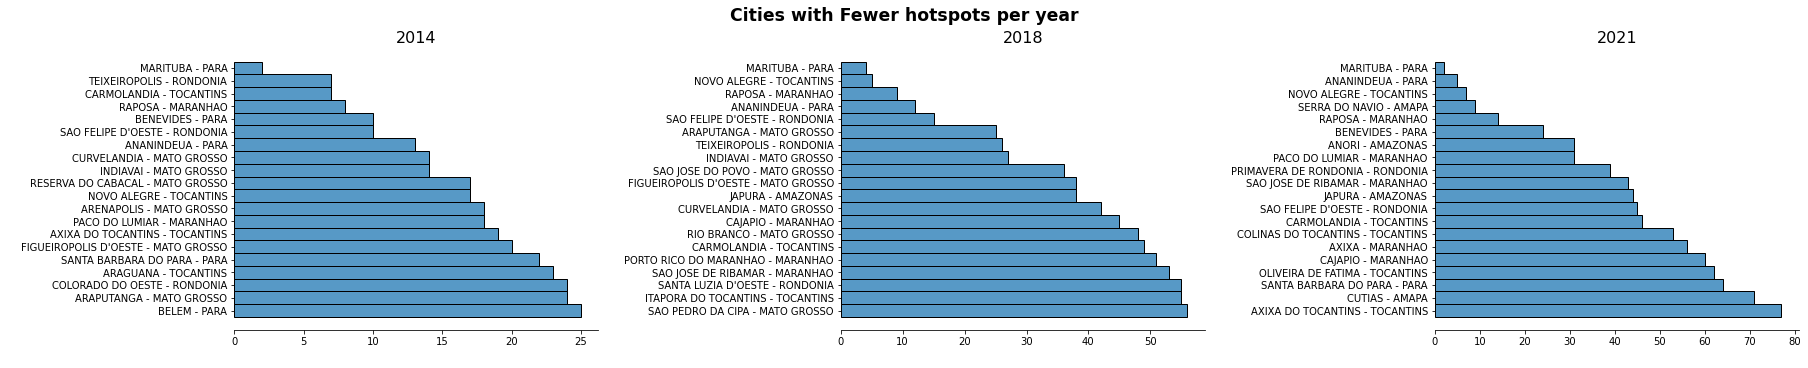

In [5]:
plot_top_hotspot(dataset, how_many=20, ascending=True)

#### List of maijors hotspot cities

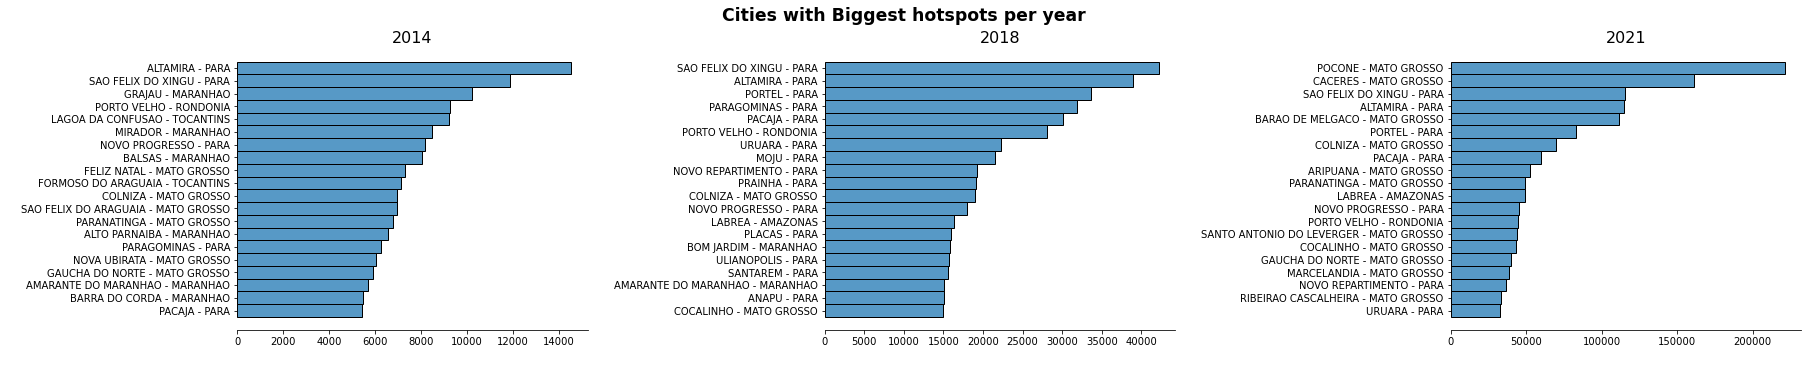

In [6]:
plot_top_hotspot(dataset, how_many=20, ascending=False)

### Get top Amazon IPS cities

In [7]:
def get_top_spi(dataset, head=10, ascending=True): 
    df = dataset.copy()
    df["regiao"] = df[['municipio', 'estado']].agg(' - '.join, axis=1)
    group = df.groupby("regiao")
    return group['IPS Amazônia'].sum().sort_values(ascending=ascending)[:head]


def get_max_spi(dataset, year):
    max_spi = dataset[(dataset["ano"] == year)]["IPS Amazônia"].max()
    return dataset[(dataset["ano"] == year) & (dataset["IPS Amazônia"] == max_spi)]


def get_min_spi(dataset, year):
    min_spi = dataset[(dataset["ano"] == year)]["IPS Amazônia"].min()
    return dataset[(dataset["ano"] == year) & (dataset["IPS Amazônia"] == min_spi)]


def plot_top_spi(dataset, how_many=10, ascending=True):
    cols = 3
    rows = math.ceil(len(YEARS_AVAILABLE) / cols)
    
    fig, axes = plt.subplots(rows, cols, figsize=(25, 5), constrained_layout=True)

    title = "Cities with {} Amazon SPI per year".format("Fewer" if ascending else "Biggest")
    fig.suptitle(title, fontsize="xx-large", fontweight='heavy')

    for idx, ax in enumerate(axes):
        year = YEARS_AVAILABLE[idx]
        yeardf = dataset[(dataset["ano"] == year)]
        tt = get_top_spi(yeardf, head=how_many, ascending=ascending)

        ax.set_title(year, fontdict={'fontsize': 16})
        ax.set_xlabel(" ")
        ax.set_ylabel(" ")
        
        # Remove axes splines
        for spin in ['top', 'left', 'right']:
            ax.spines[spin].set_visible(False)
            
        sns.histplot(data=tt, y=tt.index, weights=tt.values, ax=ax)

In [8]:
get_min_spi(dataset, 2021)

,ano,estado,municipio,diasemchuva,precipitacao,riscofogo,frp,fococalor,IPS Amazônia,Media IPS,...,Gravidez na infância e adolescência,Trabalho Infantil,Vulnerabilidade familiar,Violência contra indígenas,Violência contra indígenas Taxa,Violência contra mulheres,Violência infantil,Violência infantil Taxa,Empregos ensino superior,Mulheres com empregos ensino superior
1789,2021,MARANHAO,SAO FELIX DE BALSAS,34.9,0.11,0.95,7.22,4575,43.6,54.59,...,30.77,69.13,53.85,0.0,1.0,180.42,206.55,4.0,17.23,13.74


#### List of minors SPImazon spi cities

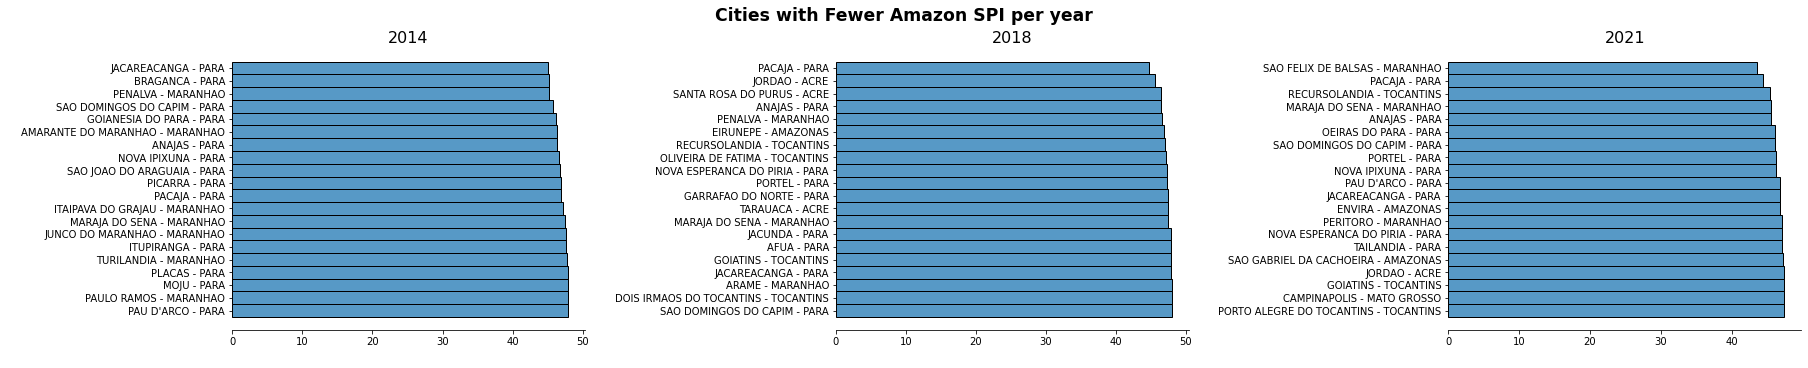

In [9]:
plot_top_spi(dataset, how_many=20, ascending=True)

#### List of maijors SPImazon spi cities

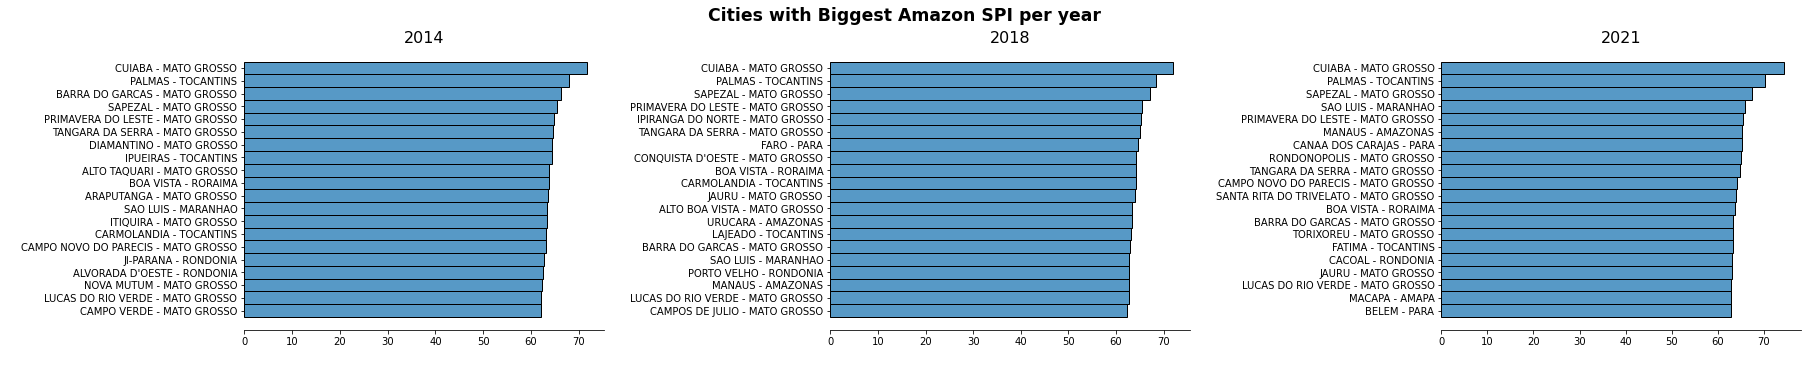

In [10]:
plot_top_spi(dataset, how_many=20, ascending=False)

In [ ]:
year = 2021

low_of_spi_mean = dataset[(dataset["IPS Amazônia"] < dataset["Media IPS"]) & (dataset["ano"] == year)]
low_of_spi_mean.sort_values(by="fococalor", ascending=False)

### Visualize the correlation in a matrix

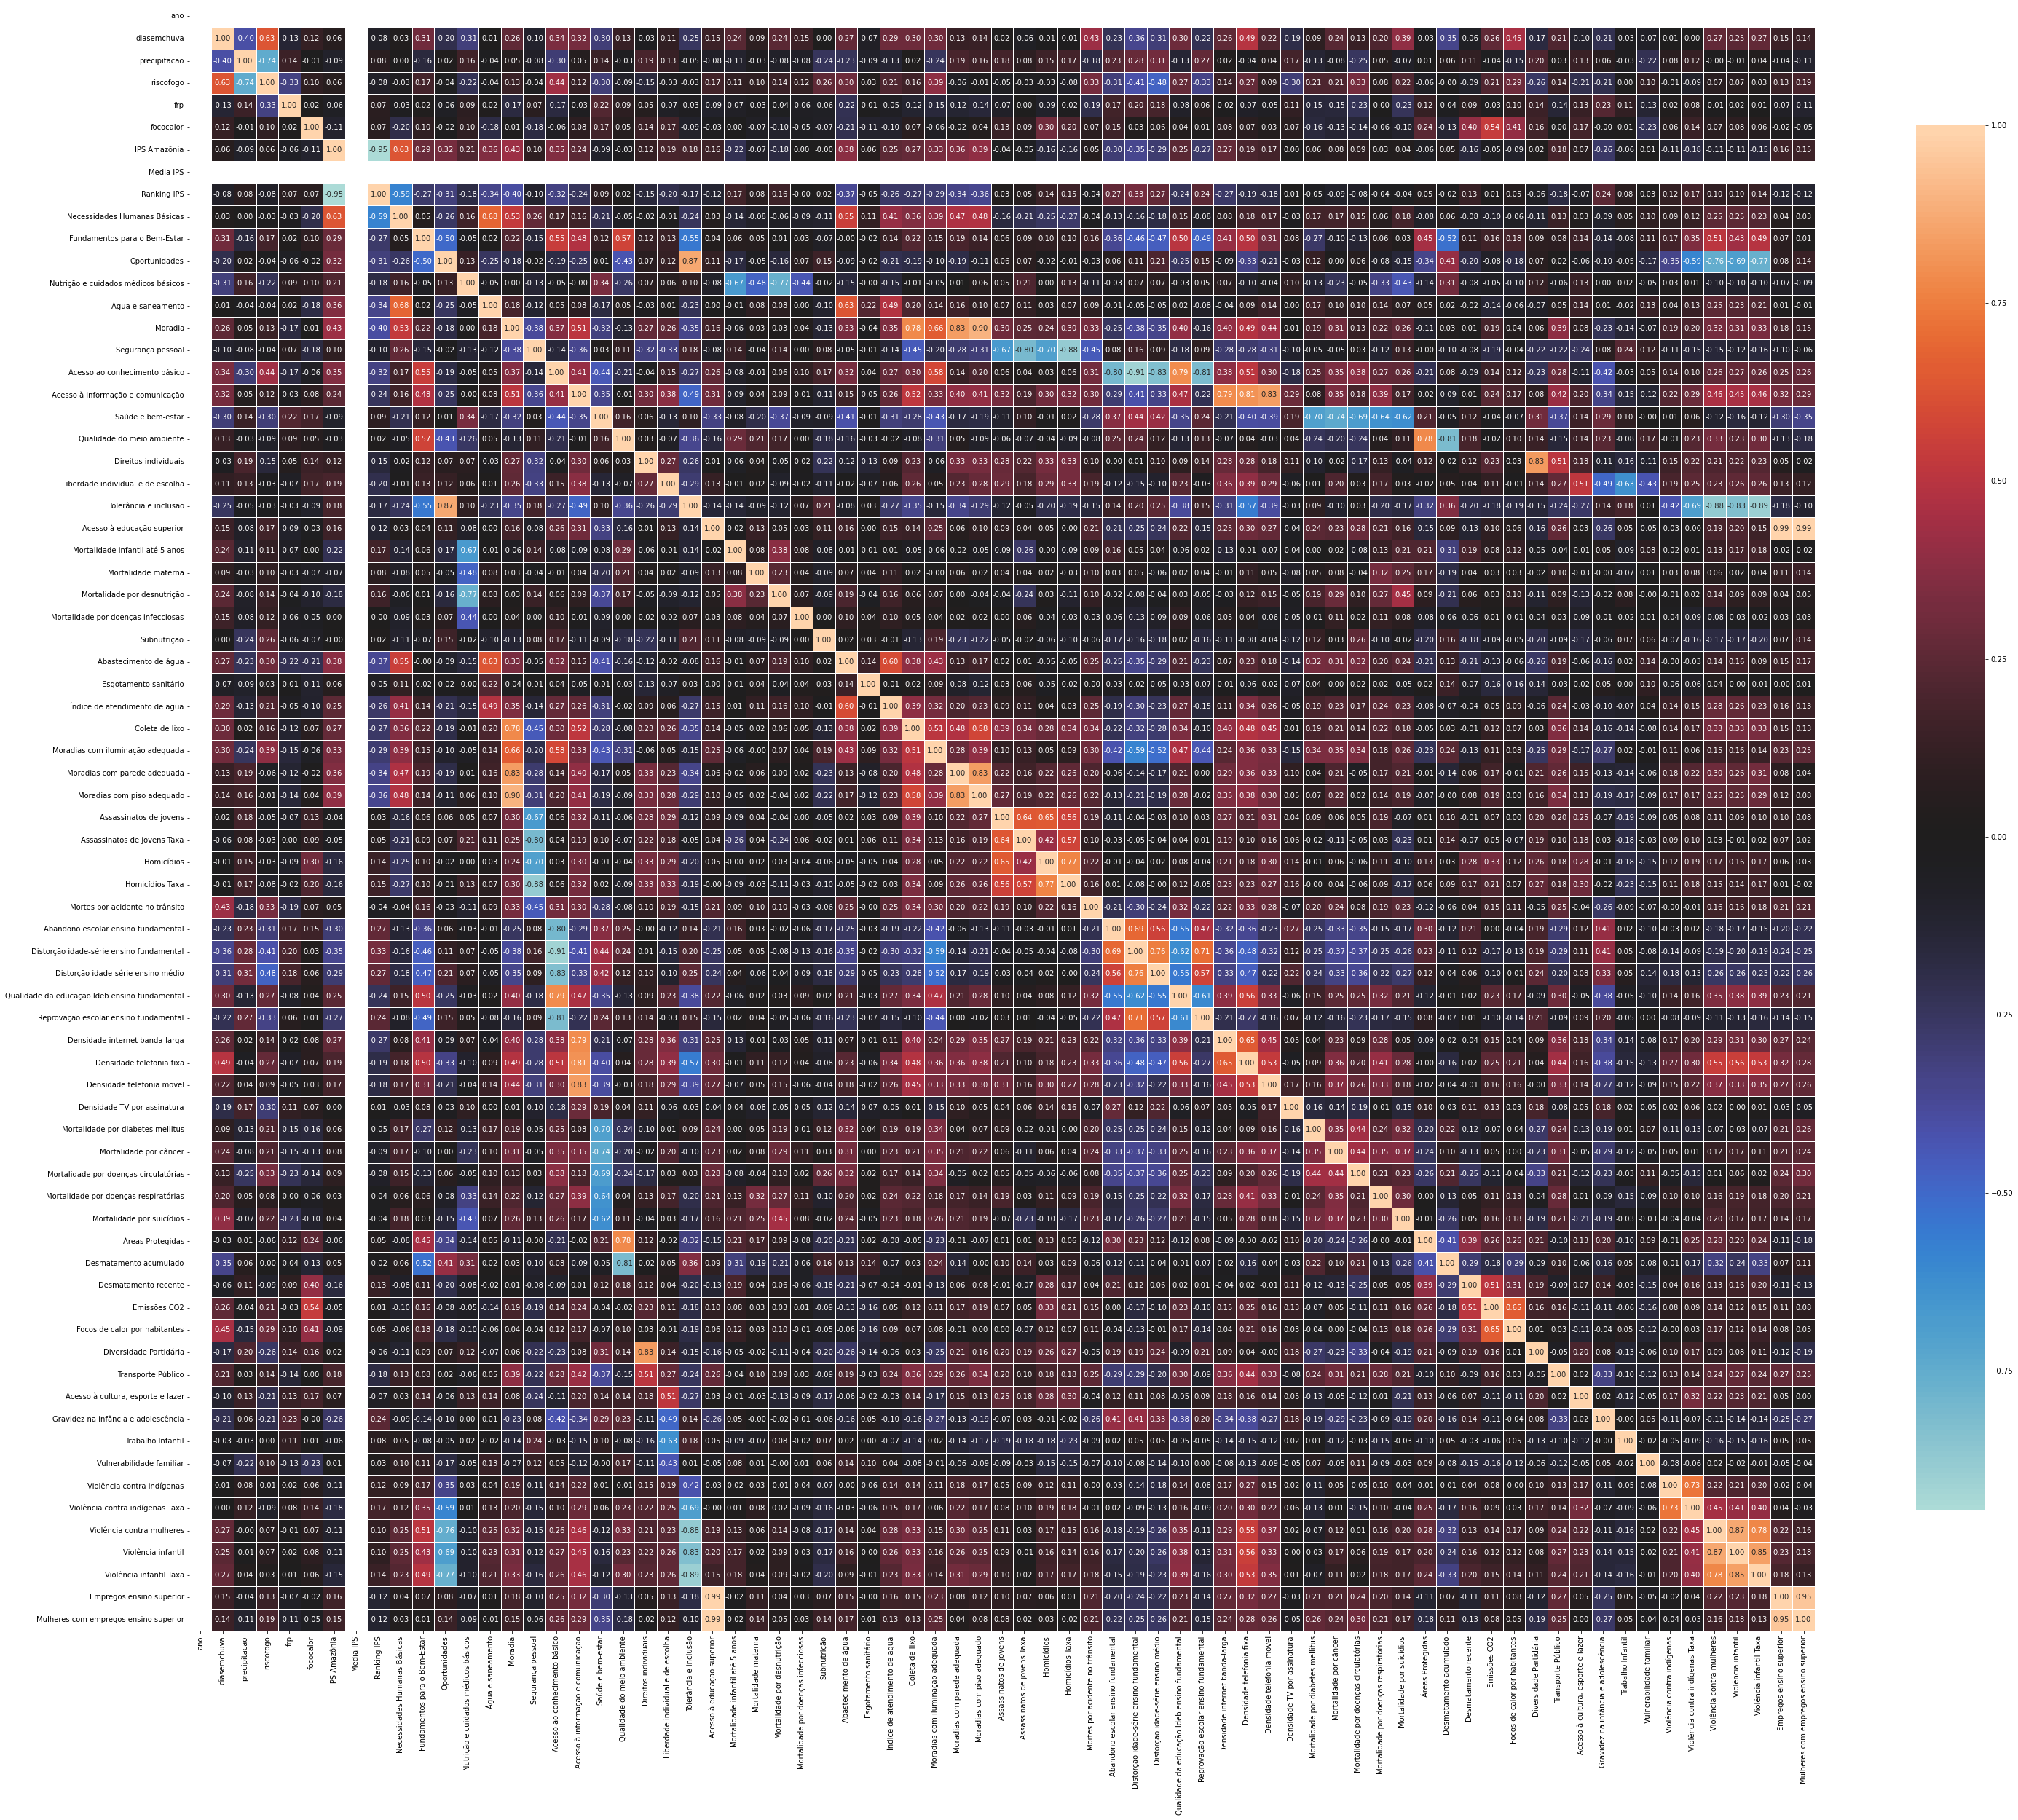

In [28]:
# def show_heatmap_corr(dataset):
#     fig, ax = plt.subplots(figsize=(50,50))
#     sns.heatmap(
#         dataset.corr(), 
#         vmax=1.0, 
#         center=0, 
#         fmt='.2f',
#         square=True, 
#         linewidths=.5, 
#         annot=True, 
#         cbar_kws={"shrink": .70}
#     )
    
# show_heatmap_corr(low_of_spi_mean)

In [ ]:
# sns.set_theme(style="ticks")
# sns.pairplot(low_of_spi_mean)

In [13]:
def plot_indicators(dataset, indicators, labels):
    for idx, ind in enumerate(indicators):       
        plt.scatter(dataset.ano, ind, label=labels[idx], s=100, ec="white", zorder=2)
        plt.plot(dataset.ano, ind)
        plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
        
    plt.show()

In [14]:
citie_name = "NOVA IPIXUNA"
citie_data = dataset[dataset.municipio == citie_name]

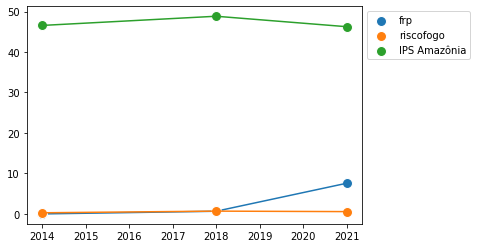

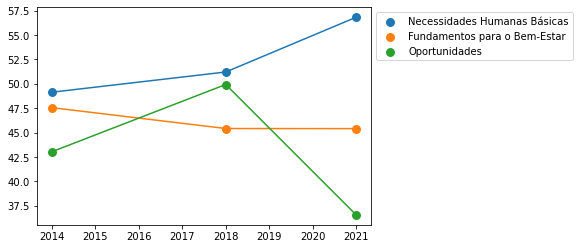

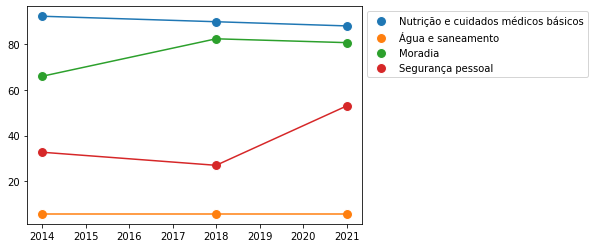

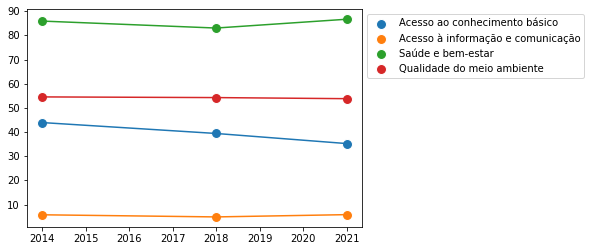

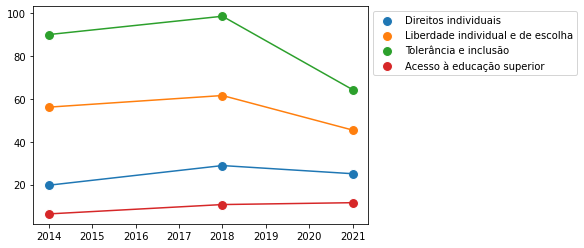

In [15]:
# compare hotspot and Amazon IPS
labels = [ "frp", "riscofogo", "IPS Amazônia"]
indicators = [citie_data[labels[0]], citie_data[labels[1]], citie_data[labels[2]]]
plot_indicators(citie_data, indicators, labels)

# Show Dimensions
labels = ["Necessidades Humanas Básicas", "Fundamentos para o Bem-Estar", "Oportunidades"]
indicators = [citie_data[labels[0]], citie_data[labels[1]], citie_data[labels[2]]]
plot_indicators(citie_data, indicators, labels)
plt.show()

# Show Necessidades Humanas Básicas components
labels = ["Nutrição e cuidados médicos básicos", "Água e saneamento", "Moradia", "Segurança pessoal"]
indicators = [citie_data[labels[0]], citie_data[labels[1]], citie_data[labels[2]], citie_data[labels[3]]]
plot_indicators(citie_data, indicators, labels)

# Show Fundamentos para o Bem-Estar components
labels = ["Acesso ao conhecimento básico", "Acesso à informação e comunicação", "Saúde e bem-estar", "Qualidade do meio ambiente"]
indicators = [citie_data[labels[0]], citie_data[labels[1]], citie_data[labels[2]], citie_data[labels[3]]]
plot_indicators(citie_data, indicators, labels)

# Show Oportunidades components
labels = labels = ["Direitos individuais", "Liberdade individual e de escolha", "Tolerância e inclusão", "Acesso à educação superior"]
indicators = [citie_data[labels[0]], citie_data[labels[1]], citie_data[labels[2]], citie_data[labels[3]]]
plot_indicators(citie_data, indicators, labels)